In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import glob
import os

from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Features

## Ground_truth

In [2]:
ground_truth = pd.read_csv('/content/drive/MyDrive/CA684_Assignment/Dev-set/Ground-truth/ground-truth.csv')

In [3]:
ground_truth.head()

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,video3.webm,0.924,34,0.846,13
1,video4.webm,0.923,33,0.667,12
2,video6.webm,0.863,33,0.700,10
3,video8.webm,0.922,33,0.818,11
4,video10.webm,0.950,34,0.900,10


In [4]:
ground_truth = ground_truth.drop(['nb_short-term_annotations', 'nb_long-term_annotations'], axis=1)
ground_truth.head()

,video,short-term_memorability,long-term_memorability
0,video3.webm,0.924,0.846
1,video4.webm,0.923,0.667
2,video6.webm,0.863,0.700
3,video8.webm,0.922,0.818
4,video10.webm,0.950,0.900


## Captions

In [5]:
captions = pd.read_csv('/content/drive/MyDrive/CA684_Assignment/Dev-set/Captions/dev-set_video-captions.txt',delimiter='\t',header= None,names=('video','captions'))

In [6]:
captions.head()

,video,captions
0,video3.webm,blonde-woman-is-massaged-tilt-down
1,video4.webm,roulette-table-spinning-with-ball-in-closeup-shot
2,video6.webm,khr-gangsters
3,video8.webm,medical-helicopter-hovers-at-airport
4,video10.webm,couple-relaxing-on-picnic-crane-shot


In [7]:
captions = pd.merge(ground_truth, captions, on='video')
captions.head()

,video,short-term_memorability,long-term_memorability,captions
0,video3.webm,0.924,0.846,blonde-woman-is-massaged-tilt-down
1,video4.webm,0.923,0.667,roulette-table-spinning-with-ball-in-closeup-shot
2,video6.webm,0.863,0.700,khr-gangsters
3,video8.webm,0.922,0.818,medical-helicopter-hovers-at-airport
4,video10.webm,0.950,0.900,couple-relaxing-on-picnic-crane-shot


## C3D

In [ ]:
def read_C3D(fname):
    """Scan vectors from file"""
    with open(fname) as f:
        for line in f:
            C3D =[float(item) for item in line.split()] # convert to float type, using default separator
    return C3D

In [ ]:
features = [] # Creating new list to store the C3D features
name = [] #Creating a new list to store the names of the videos
path = '/content/drive/MyDrive/CA684_Assignment/Dev-set/C3D/*.txt'
for filename in glob.glob('/content/drive/MyDrive/CA684_Assignment/Dev-set/C3D/*.txt'):
    s= read_C3D(filename)
    features.append(s)
    name.append(((filename.split('/')[-1]).split('.')[0])+ '.webm') 
#adding .webm to the name to make it similar to the video name in ground truth

In [ ]:
len(features[0])

101

In [ ]:
len(features)

6000

In [ ]:
# use dataframe to store the C3D features
c3d = pd.DataFrame(np.array(features).reshape(6000,101))
c3d["video"] = name
c3d.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,video
0,0.010858,0.010386,0.000000,0.000000e+00,0.000000e+00,0.000000,2.700000e-07,0.000000,1.000000e-08,3.400000e-07,8.000000e-08,1.000000e-08,0.000004,0.000105,0.000000e+00,4.000000e-08,1.000000e-08,0.000000,0.000000,1.331800e-04,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,7.600000e-07,0.000000,9.800000e-07,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,6.000000e-08,0.000021,5.000000e-08,0.000000e+00,1.000000e-08,3.000000e-08,2.000000e-08,0.000000e+00,...,0.970125,0.000016,0.001298,0.000032,0.000001,0.000000,0.000000,1.000000e-08,2.500000e-07,0.000000e+00,0.000000,5.000000e-08,0.000000,1.000000e-08,1.000000e-08,4.200000e-07,0.000000e+00,3.000000e-08,2.000000e-08,0.000000,0.000000,0.000000,6.000000e-08,0.000000,0.000000,9.000000e-08,0.000000,0.000000e+00,1.100000e-07,1.400000e-07,0.000000,0.000000,1.700000e-07,0.000000,0.000000e+00,1.000000e-08,1.300000e-06,2.600000e-06,8.000000e-08,video6632.webm
1,0.000200,0.000065,0.993807,2.000000e-07,4.700000e-07,0.000073,3.700000e-06,0.000337,6.710000e-06,2.290000e-06,6.380000e-06,7.340000e-06,0.000019,0.000007,3.240000e-06,3.810000e-06,1.411000e-05,0.000001,0.000003,2.300000e-07,1.900000e-07,0.002938,5.200000e-07,9.200000e-07,1.136000e-05,0.000011,3.310400e-04,9.200000e-07,0.000022,8.000000e-08,0.000028,0.000013,5.778000e-05,0.000037,1.683000e-05,6.860000e-06,3.990000e-06,8.030000e-06,1.450000e-06,3.800000e-07,...,0.000027,0.000013,0.000077,0.000050,0.000138,0.000012,0.000007,4.100000e-07,5.440000e-06,3.400000e-07,0.000007,8.399000e-05,0.000004,3.970000e-06,5.900000e-07,1.285300e-04,8.800000e-07,2.228000e-05,1.105000e-05,0.000003,0.000015,0.000014,4.090000e-06,0.000003,0.000005,4.920000e-06,0.000005,6.400000e-07,2.372000e-05,6.610000e-06,0.000010,0.000002,5.800000e-06,0.000001,1.490000e-06,1.170000e-05,1.500000e-07,8.300000e-07,1.060000e-04,video6634.webm
2,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000008,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.999985,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.120000e-06,video6633.webm
3,0.005959,0.004765,0.003757,5.787100e-04,7.344000e-05,0.000129,4.665300e-04,0.010266,3.028100e-04,2.196500e-04,2.521800e-04,2.963730e-03,0.000032,0.000592,3.260000e-05,1.466430e-03,2.430700e-04,0.000181,0.004019,2.390960e-03,1.206900e-04,0.008488,5.216200e-04,4.164600e-04,1.643420e-02,0.049686,1.470550e-03,5.432000e-05,0.001055,5.442770e-03,0.000173,0.024688,9.640700e-04,0.000880,1.140529e-02,4.522160e-03,8.594500e-04,6.573000e-04,6.942400e-04,1.823110e-03,...,0.000639,0.014109,0.000472,0.002461,0.004046,0.000905,0.000997,2.514660e-03,1.587440e-03,1.125030e-03,0.001008,2.133877e-02,0.000647,1.373010e-03,9.568000e-05,5.635083e-02,1.628000e-05,5.379910e-03,6.020020e-03,0.046499,0.023942,0.020658,3.349520e-03,0.002637,0.000094,1.170705e-02,0.000229,9.789210e-03,2.764390e-03,8.052350e-03,0.003992,0.004137,3.670390e-02,0.000767,3.692100e-04,1.251980e-02,8.422000e-05,1.159825e-02,1.155040e-03,video6645.webm
4,0.005782,0.000306,0.004011,1.007000e-05,1.034000e-05,0.000002,3.160000e-06,0.000003,1.984000e-0

In [ ]:
c3d = pd.merge(ground_truth, c3d, on='video')

In [ ]:
c3d.head()

,video,short-term_memorability,long-term_memorability,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,video3.webm,0.924,0.846,0.020249,0.001578,0.000826,0.000945,0.000063,0.000003,0.001162,0.000097,0.000022,0.000010,0.000337,0.000636,1.111700e-04,0.001008,0.000004,0.000631,3.905000e-05,0.000041,0.000091,0.000303,1.541000e-05,0.000032,5.221000e-05,0.000062,0.017465,0.000666,0.000065,0.000054,0.000273,0.001386,0.000003,0.001356,0.000517,2.426120e-03,0.002719,2.770000e-06,0.001557,...,0.096647,0.004458,0.011840,0.000287,0.002195,0.002792,0.000018,0.003365,0.000061,0.000573,0.000273,0.000034,0.006737,0.000021,0.000098,2.502000e-05,0.005768,2.990000e-06,0.000085,0.000607,0.000461,0.001189,0.000270,0.000127,0.000106,0.000154,0.000567,0.000020,0.000894,0.001079,0.001042,0.000161,0.000257,0.046617,0.000156,0.000006,0.000537,0.000339,0.008437,0.000470
1,video4.webm,0.923,0.667,0.000118,0.000891,0.000188,0.000045,0.000063,0.000002,0.000641,0.000011,0.000017,0.000014,0.000336,0.004081,5.900000e-07,0.000411,0.000003,0.000243,6.600000e-07,0.000002,0.000535,0.000278,4.804000e-05,0.001153,2.792000e-05,0.000040,0.022276,0.004529,0.000020,0.000029,0.000045,0.060436,0.000039,0.027208,0.000074,2.719000e-05,0.000623,2.609600e-04,0.000183,...,0.000372,0.000154,0.000148,0.000086,0.000267,0.000014,0.001430,0.004417,0.000064,0.000105,0.003129,0.000055,0.000061,0.000025,0.004283,1.032000e-05,0.000062,2.903000e-05,0.000374,0.000139,0.741702,0.007178,0.000346,0.000104,0.000181,0.000052,0.004839,0.000078,0.042325,0.000623,0.000582,0.000393,0.000864,0.000947,0.000136,0.000007,0.000360,0.000159,0.001025,0.000020
2,video6.webm,0.863,0.700,0.011765,0.000746,0.000784,0.000013,0.000007,0.000028,0.000041,0.000014,0.000041,0.000083,0.000048,0.000080,1.066610e-03,0.000958,0.000011,0.000070,2.992000e-05,0.000038,0.000031,0.000008,9.700000e-07,0.002905,1.849000e-05,0.000013,0.000192,0.000050,0.000532,0.000027,0.000051,0.000010,0.000005,0.000029,0.000033,3.260172e-02,0.000034,7.100000e-07,0.000006,...,0.876291,0.005509,0.008852,0.000399,0.000069,0.013166,0.000015,0.000044,0.000520,0.000046,0.000007,0.000024,0.010491,0.000475,0.000023,5.590000e-06,0.005554,2.500000e-07,0.000057,0.000328,0.000149,0.001844,0.000008,0.000103,0.000030,0.000005,0.000179,0.000001,0.000006,0.000215,0.000224,0.000003,0.000031,0.002538,0.000104,0.000005,0.000064,0.005380,0.001027,0.001384
3,video8.webm,0.922,0.818,0.000223,0.000165,0.000007,0.000016,0.000005,0.000014,0.000154,0.000008,0.000004,0.000009,0.001057,0.000126,3.404000e-05,0.000004,0.000006,0.000012,1.940000e-06,0.000003,0.001759,0.000005,8.330000e-06,0.000027,3.200000e-07,0.000010,0.000137,0.000006,0.000005,0.000008,0.000008,0.000611,0.000166,0.583214,0.000004,2.100000e-07,0.000002,2.136000e-05,0.000003,...,0.000009,0.000007,0.000005,0.000539,0.000035,0.000391,0.000021,0.000043,0.000010,0.000028,0.012471,0.006671,0.001187,0.000002,0.119488,5.600000e-07,0.000004,4.250000e-06,0.000040,0.000148,0.103989,0.058989,0.000002,0.000069,0.000004,0.000130,0.001182,0.000003,0.000006,0.000044,0.000046,0.000009,0.000023,0.000053,0.000048,0.000019,0.000001,0.000004,0.000380,0.000029
4,video10.webm,0.950,0.900,0.000090,0.000615,0.003436,0.001281,0.003551,0.000313,0.000042,0.000018,0.000157,0.000117,0.000256,0.000116,3.234800e-04,0.009888,0.000001,0.000576,3.004000e-05,0.000008,0.002029,0.000016,7.690000e-06,0.007324,2.863000e-05,0.000015,0.035220,0.000153,0.001053,0.000031,0.000026,0.001376,0.000215,0.001759,0.000013,1.698540e-03,0.000248,1.754577e-02,0.000260,...,0.000236,0.000046,0.000027,0.000203,0.010644,0.000252,0.000349,0.001776,0.000006,0.001443,0.000146,0.019003,0.000584,0.000027,0.000692,5.650000e-06,0.000403,2.894700e-04,0.000197,0.001254,0.005257,0.045808,0.000008,0.000296,0.003893,0.000318,0.000048,0.000018,0.000264,0.000026,0.000037,0.000690,0.000171,0.00023

## HMP

In [ ]:
def read_HMP(fname):
    """Scan HMP(Histogram of Motion Patterns) features from file"""
    with open(fname) as f:
        for line in f:
            pairs=line.split()
            HMP_temp = { int(p.split(':')[0]) : float(p.split(':')[1]) for p in pairs}
    # there are 6075 bins, fill zeros
    HMP = np.zeros(6075)
    for idx in HMP_temp.keys():
        HMP[idx-1] = HMP_temp[idx]            
    return HMP

In [ ]:
#Load HMP Features
df_hmp_dev = pd.DataFrame(columns = ['video', 'arrayInfo'])

#dir_hmp = './dev-set/HMP'
dir_hmp_dev = '/content/drive/MyDrive/CA684_Assignment/Dev-set/HMP'

for filename in os.listdir(dir_hmp_dev):
    if filename.endswith(".txt"):
        path = os.path.join(dir_hmp_dev, filename)
        array = read_HMP(path)
        fileName= filename.replace(".txt",".webm")
        df_hmp_dev = df_hmp_dev.append({'video': fileName, 'arrayInfo': array}, ignore_index=True)
    else:
        break


In [ ]:
hmp = ground_truth.merge(df_hmp_dev,on=["video"],how="inner")
hmp.columns

Index(['video', 'short-term_memorability', 'long-term_memorability',
       'arrayInfo'],
      dtype='object')

In [ ]:
hmp.head()

,video,short-term_memorability,long-term_memorability,arrayInfo
0,video3.webm,0.924,0.846,"[0.125563, 0.024036, 0.000314, 0.0, 0.015864, ..."
1,video4.webm,0.923,0.667,"[0.007526, 0.001421, 6.8e-05, 0.0, 0.001184, 0..."
2,video6.webm,0.863,0.700,"[0.109584, 0.018978, 0.000289, 0.0, 0.008774, ..."
3,video8.webm,0.922,0.818,"[0.120431, 0.013561, 0.000277, 0.0, 0.018974, ..."
4,video10.webm,0.950,0.900,"[0.005026, 0.001356, 5.5e-05, 0.0, 0.000665, 2..."


In [ ]:
hmp_array = np.empty((0, 6075))
for item in hmp['arrayInfo']:
    hmp_array = np.append(hmp_array, np.array([item]), axis = 0)


hmp_array = pd.DataFrame(np.array(hmp_array).reshape(6000,6075))
hmp_array

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6035,6036,6037,6038,6039,6040,6041,6042,6043,6044,6045,6046,6047,6048,6049,6050,6051,6052,6053,6054,6055,6056,6057,6058,6059,6060,6061,6062,6063,6064,6065,6066,6067,6068,6069,6070,6071,6072,6073,6074
0,0.125563,0.024036,0.000314,0.0,0.015864,0.000358,0.0,0.000000,0.000086,0.0,0.0,0.0,0.0,0.002795,0.000054,0.0,0.000000,0.000037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000002,0.000173,0.000459,0.000000,0.000148,0.000104,0.000000,0.000121,0.000551,0.000000,0.000114,0.000884,0.000002,0.000116,0.000077,0.000002,0.000027,0.000136,0.000000,0.000000,0.000002,0.000000,0.000091,0.000035,0.000000,0.000163,0.000467,0.000002,0.000010,0.000017,0.000000,0.000393,0.000279,0.000000,0.000289,0.001926,0.000000,0.000086,0.000580,0.000000
1,0.007526,0.001421,0.000068,0.0,0.001184,0.000143,0.0,0.000000,0.000079,0.0,0.0,0.0,0.0,0.000246,0.000024,0.0,0.000000,0.000042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000685,0.000308,0.001054,0.000751,0.000176,0.000062,0.000000,0.000123,0.000398,0.000086,0.000246,0.000433,0.000446,0.000143,0.000053,0.000000,0.000053,0.000099,0.000009,0.000004,0.000033,0.000004,0.000051,0.000035,0.000000,0.000062,0.000358,0.000035,0.000024,0.000083,0.000053,0.000244,0.000066,0.000000,0.000081,0.000617,0.000094,0.000220,0.000762,0.001224
2,0.109584,0.018978,0.000289,0.0,0.008774,0.000208,0.0,0.000002,0.000088,0.0,0.0,0.0,0.0,0.002046,0.000061,0.0,0.000000,0.000038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000083,0.000057,0.000158,0.000073,0.000021,0.000009,0.000002,0.000019,0.000095,0.000021,0.000019,0.000090,0.000073,0.000050,0.000024,0.000000,0.000012,0.000021,0.000000,0.000000,0.000002,0.000000,0.000017,0.000007,0.000002,0.000066,0.000203,0.000026,0.000002,0.000040,0.000007,0.000054,0.000045,0.000000,0.000028,0.000291,0.000033,0.000052,0.000258,0.000215
3,0.120431,0.013561,0.000277,0.0,0.018974,0.000913,0.0,0.000024,0.000713,0.0,0.0,0.0,0.0,0.002496,0.000149,0.0,0.000011,0.000157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000210,0.000434,0.000543,0.000412,0.000412,0.000045,0.000003,0.000144,0.000282,0.000037,0.000197,0.000218,0.000157,0.000237,0.000021,0.000000,0.000040,0.000056,0.000008,0.000005,0.000013,0.000019,0.000168,0.000013,0.000000,0.000133,0.000202,0.000029,0.000029,0.000035,0.000059,0.001110,0.000075,0.000008,0.000333,0.000793,0.000101,0.000588,0.000503,0.000452
4,0.005026,0.001356,0.000055,0.0,0.000665,0.000029,0.0,0.000000,0.000024,0.0,0.0,0.0,0.0,0.000147,0.000020,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000160,0.000996,0.001604,0.000103,0.000768,0.000215,0.000009,0.000415,0.000926,0.000020,0.000538,0.001178,0.000050,0.000518,0.000169,0.000007,0.000134,0.000169,0.000007,0.000026,0.000046,0.000007,0.000373,0.000088,0.000000,0.000338,0.000441,0.000029,0.000070,0.000149,0.000009,0.000882,0.000200,0.000009,0.000559,0.001097,0.000018,0.000632,0.001128,0.000064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.003779,0.001352,0.000077,0.0,0.000475,0.000074,0.0,0.000000,0.000020,0.0,0.0,0.0,0.0,0.000094,0.000035,0.0,0.000000,0.000009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000464,0.000443,0.001429,0.000467,0.000199,0.000210,0.000004,0.000221,0.000589,0.000072,0.000269,0.000758,0.000237,0.000156,0.000123,0.000000,0.000081,0.000173,0.000011,0.000022,0.000074,0.000004,

In [ ]:
hmp = ground_truth.join(hmp_array)

In [ ]:
hmp.head()

,video,short-term_memorability,long-term_memorability,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,6035,6036,6037,6038,6039,6040,6041,6042,6043,6044,6045,6046,6047,6048,6049,6050,6051,6052,6053,6054,6055,6056,6057,6058,6059,6060,6061,6062,6063,6064,6065,6066,6067,6068,6069,6070,6071,6072,6073,6074
0,video3.webm,0.924,0.846,0.125563,0.024036,0.000314,0.0,0.015864,0.000358,0.0,0.000000,0.000086,0.0,0.0,0.0,0.0,0.002795,0.000054,0.0,0.000000,0.000037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000002,0.000173,0.000459,0.000000,0.000148,0.000104,0.000000,0.000121,0.000551,0.000000,0.000114,0.000884,0.000002,0.000116,0.000077,0.000002,0.000027,0.000136,0.000000,0.000000,0.000002,0.000000,0.000091,0.000035,0.000000,0.000163,0.000467,0.000002,0.000010,0.000017,0.000000,0.000393,0.000279,0.000000,0.000289,0.001926,0.000000,0.000086,0.000580,0.000000
1,video4.webm,0.923,0.667,0.007526,0.001421,0.000068,0.0,0.001184,0.000143,0.0,0.000000,0.000079,0.0,0.0,0.0,0.0,0.000246,0.000024,0.0,0.000000,0.000042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000685,0.000308,0.001054,0.000751,0.000176,0.000062,0.000000,0.000123,0.000398,0.000086,0.000246,0.000433,0.000446,0.000143,0.000053,0.000000,0.000053,0.000099,0.000009,0.000004,0.000033,0.000004,0.000051,0.000035,0.000000,0.000062,0.000358,0.000035,0.000024,0.000083,0.000053,0.000244,0.000066,0.000000,0.000081,0.000617,0.000094,0.000220,0.000762,0.001224
2,video6.webm,0.863,0.700,0.109584,0.018978,0.000289,0.0,0.008774,0.000208,0.0,0.000002,0.000088,0.0,0.0,0.0,0.0,0.002046,0.000061,0.0,0.000000,0.000038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000083,0.000057,0.000158,0.000073,0.000021,0.000009,0.000002,0.000019,0.000095,0.000021,0.000019,0.000090,0.000073,0.000050,0.000024,0.000000,0.000012,0.000021,0.000000,0.000000,0.000002,0.000000,0.000017,0.000007,0.000002,0.000066,0.000203,0.000026,0.000002,0.000040,0.000007,0.000054,0.000045,0.000000,0.000028,0.000291,0.000033,0.000052,0.000258,0.000215
3,video8.webm,0.922,0.818,0.120431,0.013561,0.000277,0.0,0.018974,0.000913,0.0,0.000024,0.000713,0.0,0.0,0.0,0.0,0.002496,0.000149,0.0,0.000011,0.000157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000210,0.000434,0.000543,0.000412,0.000412,0.000045,0.000003,0.000144,0.000282,0.000037,0.000197,0.000218,0.000157,0.000237,0.000021,0.000000,0.000040,0.000056,0.000008,0.000005,0.000013,0.000019,0.000168,0.000013,0.000000,0.000133,0.000202,0.000029,0.000029,0.000035,0.000059,0.001110,0.000075,0.000008,0.000333,0.000793,0.000101,0.000588,0.000503,0.000452
4,video10.webm,0.950,0.900,0.005026,0.001356,0.000055,0.0,0.000665,0.000029,0.0,0.000000,0.000024,0.0,0.0,0.0,0.0,0.000147,0.000020,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000160,0.000996,0.001604,0.000103,0.000768,0.000215,0.000009,0.000415,0.000926,0.000020,0.000538,0.001178,0.000050,0.000518,0.000169,0.000007,0.000134,0.000169,0.000007,0.000026,0.000046,0.000007,0.000373,0.000088,0.000000,0.000338,0.000441,0.000029,0.000070,0.000149,0.000009,0.000882,0.000200,0.000009,0.000559,0.001097,0.000018,0.000632,0.001128,0.000064


## Inception

In [ ]:
from pathlib import Path
inception_path = Path('/content/drive/MyDrive/CA684_Assignment/Dev-set/InceptionV3')

In [ ]:
def parse_inception_feature(s):
    pairs = s.strip().split(' ')
    pairs = [i.split(':') for i in pairs]
    return {int(k): float(v) for k, v in pairs}

In [ ]:
def expand_inception_feature(d):
  feature = np.zeros(1000)
  for k, v in d.items():
    feature[k] = v
  return feature

In [ ]:
from tqdm import tqdm_notebook as tqdm

In [ ]:
max_iterations = 6000
inception_features_dict = {}
for file in tqdm(list(inception_path.glob('*-0.txt'))[:max_iterations]):
  # only process first frame of each video
  key = file.with_suffix('.webm').name.replace('-0', '')
  inception_features_dict[key] = expand_inception_feature(
    parse_inception_feature(
      file.open().read()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# convert features to dataframe
inceptionV3 = pd.DataFrame(inception_features_dict).T
inceptionV3 = inceptionV3.reset_index()
inceptionV3 = inceptionV3.rename(columns={'index':'video'})
inceptionV3.head()

,video,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,video737.webm,0.0,0.000000e+00,0.0,0.0,0.0,4.435398e-28,0.000000e+00,0.0,6.310194e-31,0.0,0.0,2.329334e-27,4.654276e-34,0.0,5.418367e-34,0.0,5.356847e-37,1.383024e-37,0.0,0.0,0.0,0.0,0.0,0.0,2.096655e-33,1.615457e-38,0.0,0.0,0.000000e+00,7.212354e-38,1.647407e-38,0.0,0.0,0.0,2.311764e-26,0.0,0.0,0.0,0.0,...,0.0,5.470364e-29,2.776585e-36,0.0,4.052913e-32,0.0,0.0,0.0,1.555679e-33,0.0,0.0,1.438666e-37,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.364140e-30,0.0,0.0,2.351451e-25,0.0,4.220194e-21,0.0,0.0,2.068846e-35,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,2.693321e-32,0.0,0.0
1,video7372.webm,0.0,2.196838e-35,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,9.585732e-32,0.0,0.0,1.132010e-33,2.174648e-38,0.0,0.000000e+00,0.0,6.942437e-37,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.275832e-30,4.721530e-35,0.0,0.0,0.000000e+00,0.000000e+00,2.223394e-21,0.0,0.0,0.0,3.136070e-31,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.0,3.311019e-34,0.0,0.0,0.0,6.893908e-36,0.0,0.0,4.446052e-36,0.0,0.0,0.0,0.0,0.0,0.0,5.994912e-33,1.325818e-27,0.0,0.0,3.967975e-26,0.0,0.000000e+00,0.0,0.0,1.173992e-26,2.487356e-38,0.0,1.240935e-32,0.0,0.0,8.844296e-35,0.0,0.0,0.0,0.000000e+00,0.0,0.0
2,video7370.webm,0.0,0.000000e+00,0.0,0.0,0.0,5.892599e-37,1.972554e-37,0.0,2.875673e-36,0.0,0.0,3.789954e-33,0.000000e+00,0.0,4.330006e-37,0.0,5.313943e-37,2.653361e-36,0.0,0.0,0.0,0.0,0.0,0.0,6.999037e-33,2.837484e-33,0.0,0.0,1.485320e-37,0.000000e+00,3.974605e-29,0.0,0.0,0.0,1.337409e-28,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.0,3.113606e-35,0.0,0.0,0.0,2.462888e-34,0.0,0.0,5.166168e-31,0.0,0.0,0.0,0.0,0.0,0.0,1.265559e-33,2.175304e-37,0.0,0.0,4.332053e-30,0.0,6.775225e-38,0.0,0.0,6.851539e-29,0.000000e+00,0.0,0.000000e+00,0.0,0.0,5.844780e-37,0.0,0.0,0.0,4.648735e-36,0.0,0.0
3,video7374.webm,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,3.438556e-33,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,3.791654e-27,0.000000e+00,0.0,0.0,1.544282e-35,0.000000e+00,7.537087e-22,0.0,0.0,0.0,3.718811e-28,0.0,0.0,0.0,0.0,...,0.0,4.745243e-31,1.851009e-34,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,7.197808e-38,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.554002e-22,0.0,0.0,1.674721e-38,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0
4,video7373.webm,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,5.688014e-38,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.0,3.273500e-37,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0


In [ ]:
len(inceptionV3)

6000

In [ ]:
inceptionV3 = pd.merge(ground_truth, inceptionV3,on='video')
inceptionV3

,video,short-term_memorability,long-term_memorability,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,video3.webm,0.924,0.846,2.029453e-08,1.090344e-12,3.431364e-09,8.189898e-13,3.655273e-14,1.865599e-10,8.025114e-11,2.112834e-12,1.279893e-10,1.421777e-10,4.301907e-10,2.286679e-06,7.681828e-11,3.794470e-11,2.475117e-10,2.236110e-12,3.848590e-11,4.740011e-10,3.198078e-13,8.395070e-11,6.721827e-08,1.245910e-13,5.518279e-11,6.730328e-13,2.257557e-09,7.238943e-09,1.233821e-12,1.598541e-09,2.569910e-09,2.155077e-09,1.372267e-08,1.807634e-08,4.841556e-13,4.985509e-12,4.888466e-04,1.748098e-11,3.878522e-12,...,5.504524e-13,1.729948e-10,4.324135e-10,4.488289e-11,9.309242e-11,7.327435e-12,2.575580e-11,2.548098e-12,3.507918e-08,2.602202e-13,2.668102e-09,7.477819e-07,1.022439e-16,1.877881e-13,3.042647e-10,3.940097e-15,4.940004e-17,9.180812e-20,7.647996e-08,3.100791e-08,4.351464e-13,1.004334e-09,9.868457e-08,1.105340e-13,2.341297e-15,1.761305e-10,2.528041e-09,1.505675e-08,3.403410e-08,1.102657e-14,2.773339e-09,4.252009e-13,3.056650e-12,5.498894e-11,4.302251e-14,1.781814e-11,3.063809e-14,1.101414e-11,3.240121e-15,2.704308e-10
1,video4.webm,0.923,0.667,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.100784e-35,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,5.501538e-24,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.093556e-24,0.000000e+00,0.000000e+00,1.775702e-37,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,video6.webm,0.863,0.700,2.271325e-16,2.926813e-18,3.022254e-19,4.139101e-19,2.944877e-18,2.932248e-15,6.475311e-18,8.793485e-19,1.097446e-15,2.816225e-17,2.516601e-18,9.759668e-13,3.290630e-17,2.100690e-15,6.728361e-16,1.141341e-16,2.508131e-16,6.879621e-16,9.331942e-21,5.544335e-18,4.058185e-15,1.815704e-20,7.948132e-19,5.282856e-19,2.566663e-14,1.968903e-12,1.671343e-24,6.368899e-16,1.098628e-12,7.532960e-17,3.520869e-10,1.233129e-15,2.850956e-24,4.173718e-17,4.562128e-09,1.941678e-16,5.656070e-22,...,4.983875e-21,9.521967e-18,7.938202e-17,9.961560e-17,2.722320e-14,4.582787e-21,2.669127e-17,4.207481e-24,1.602321e-14,6.119853e-20,1.898454e-21,1.720160e-15,1.539879e-29,4.526580e-21,2.062750e-13,5.335764e-24,1.081799e-25,3.227003e-28,1.049013e-07,6.889270e-13,2.390780e-20,4.689680e-19,3.255726e-13,1.908798e-25,1.175189e-21,1.058365e-17,5.736792e-16,8.558914e-10,7.972950e-17,1.706612e-22,2.316734e-15,5.629470e-20,1.055689e-14,2.007447e-14,2.190508e-20,7.403642e-19,8.302431e-23,1.294177e-16,3.238963e-22,4.603321e-21
3,video8.webm,0.922,0.818,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00

# Define the function for calculating Spearman Score

In [22]:
def Get_score(Y_pred,Y_true):
    '''Calculate the Spearmann"s correlation coefficient'''
    Y_pred = np.squeeze(Y_pred)
    Y_true = np.squeeze(Y_true)
    if Y_pred.shape != Y_true.shape:
        print('Input shapes don\'t match!')
    else:
        if len(Y_pred.shape) == 1:
            Res = pd.DataFrame({'Y_true':Y_true,'Y_pred':Y_pred})
            score_mat = Res[['Y_true','Y_pred']].corr(method='spearman',min_periods=1)
            print('The Spearman\'s correlation coefficient is: %.3f' % score_mat.iloc[1][0])
        else:
            for ii in range(Y_pred.shape[1]):
                Get_score(Y_pred[:,ii],Y_true[:,ii])

# Modelling

In [ ]:
ground_truth.head()

,video,short-term_memorability,long-term_memorability
0,video3.webm,0.924,0.846
1,video4.webm,0.923,0.667
2,video6.webm,0.863,0.700
3,video8.webm,0.922,0.818
4,video10.webm,0.950,0.900


In [ ]:
captions.head()

,video,short-term_memorability,long-term_memorability,captions
0,video3.webm,0.924,0.846,blonde-woman-is-massaged-tilt-down
1,video4.webm,0.923,0.667,roulette-table-spinning-with-ball-in-closeup-shot
2,video6.webm,0.863,0.700,khr-gangsters
3,video8.webm,0.922,0.818,medical-helicopter-hovers-at-airport
4,video10.webm,0.950,0.900,couple-relaxing-on-picnic-crane-shot


In [ ]:
c3d.head()

,video,short-term_memorability,long-term_memorability,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,video3.webm,0.924,0.846,0.020249,0.001578,0.000826,0.000945,0.000063,0.000003,0.001162,0.000097,0.000022,0.000010,0.000337,0.000636,1.111700e-04,0.001008,0.000004,0.000631,3.905000e-05,0.000041,0.000091,0.000303,1.541000e-05,0.000032,5.221000e-05,0.000062,0.017465,0.000666,0.000065,0.000054,0.000273,0.001386,0.000003,0.001356,0.000517,2.426120e-03,0.002719,2.770000e-06,0.001557,...,0.096647,0.004458,0.011840,0.000287,0.002195,0.002792,0.000018,0.003365,0.000061,0.000573,0.000273,0.000034,0.006737,0.000021,0.000098,2.502000e-05,0.005768,2.990000e-06,0.000085,0.000607,0.000461,0.001189,0.000270,0.000127,0.000106,0.000154,0.000567,0.000020,0.000894,0.001079,0.001042,0.000161,0.000257,0.046617,0.000156,0.000006,0.000537,0.000339,0.008437,0.000470
1,video4.webm,0.923,0.667,0.000118,0.000891,0.000188,0.000045,0.000063,0.000002,0.000641,0.000011,0.000017,0.000014,0.000336,0.004081,5.900000e-07,0.000411,0.000003,0.000243,6.600000e-07,0.000002,0.000535,0.000278,4.804000e-05,0.001153,2.792000e-05,0.000040,0.022276,0.004529,0.000020,0.000029,0.000045,0.060436,0.000039,0.027208,0.000074,2.719000e-05,0.000623,2.609600e-04,0.000183,...,0.000372,0.000154,0.000148,0.000086,0.000267,0.000014,0.001430,0.004417,0.000064,0.000105,0.003129,0.000055,0.000061,0.000025,0.004283,1.032000e-05,0.000062,2.903000e-05,0.000374,0.000139,0.741702,0.007178,0.000346,0.000104,0.000181,0.000052,0.004839,0.000078,0.042325,0.000623,0.000582,0.000393,0.000864,0.000947,0.000136,0.000007,0.000360,0.000159,0.001025,0.000020
2,video6.webm,0.863,0.700,0.011765,0.000746,0.000784,0.000013,0.000007,0.000028,0.000041,0.000014,0.000041,0.000083,0.000048,0.000080,1.066610e-03,0.000958,0.000011,0.000070,2.992000e-05,0.000038,0.000031,0.000008,9.700000e-07,0.002905,1.849000e-05,0.000013,0.000192,0.000050,0.000532,0.000027,0.000051,0.000010,0.000005,0.000029,0.000033,3.260172e-02,0.000034,7.100000e-07,0.000006,...,0.876291,0.005509,0.008852,0.000399,0.000069,0.013166,0.000015,0.000044,0.000520,0.000046,0.000007,0.000024,0.010491,0.000475,0.000023,5.590000e-06,0.005554,2.500000e-07,0.000057,0.000328,0.000149,0.001844,0.000008,0.000103,0.000030,0.000005,0.000179,0.000001,0.000006,0.000215,0.000224,0.000003,0.000031,0.002538,0.000104,0.000005,0.000064,0.005380,0.001027,0.001384
3,video8.webm,0.922,0.818,0.000223,0.000165,0.000007,0.000016,0.000005,0.000014,0.000154,0.000008,0.000004,0.000009,0.001057,0.000126,3.404000e-05,0.000004,0.000006,0.000012,1.940000e-06,0.000003,0.001759,0.000005,8.330000e-06,0.000027,3.200000e-07,0.000010,0.000137,0.000006,0.000005,0.000008,0.000008,0.000611,0.000166,0.583214,0.000004,2.100000e-07,0.000002,2.136000e-05,0.000003,...,0.000009,0.000007,0.000005,0.000539,0.000035,0.000391,0.000021,0.000043,0.000010,0.000028,0.012471,0.006671,0.001187,0.000002,0.119488,5.600000e-07,0.000004,4.250000e-06,0.000040,0.000148,0.103989,0.058989,0.000002,0.000069,0.000004,0.000130,0.001182,0.000003,0.000006,0.000044,0.000046,0.000009,0.000023,0.000053,0.000048,0.000019,0.000001,0.000004,0.000380,0.000029
4,video10.webm,0.950,0.900,0.000090,0.000615,0.003436,0.001281,0.003551,0.000313,0.000042,0.000018,0.000157,0.000117,0.000256,0.000116,3.234800e-04,0.009888,0.000001,0.000576,3.004000e-05,0.000008,0.002029,0.000016,7.690000e-06,0.007324,2.863000e-05,0.000015,0.035220,0.000153,0.001053,0.000031,0.000026,0.001376,0.000215,0.001759,0.000013,1.698540e-03,0.000248,1.754577e-02,0.000260,...,0.000236,0.000046,0.000027,0.000203,0.010644,0.000252,0.000349,0.001776,0.000006,0.001443,0.000146,0.019003,0.000584,0.000027,0.000692,5.650000e-06,0.000403,2.894700e-04,0.000197,0.001254,0.005257,0.045808,0.000008,0.000296,0.003893,0.000318,0.000048,0.000018,0.000264,0.000026,0.000037,0.000690,0.000171,0.00023

In [ ]:
hmp.head()

,video,short-term_memorability,long-term_memorability,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,6035,6036,6037,6038,6039,6040,6041,6042,6043,6044,6045,6046,6047,6048,6049,6050,6051,6052,6053,6054,6055,6056,6057,6058,6059,6060,6061,6062,6063,6064,6065,6066,6067,6068,6069,6070,6071,6072,6073,6074
0,video3.webm,0.924,0.846,0.125563,0.024036,0.000314,0.0,0.015864,0.000358,0.0,0.000000,0.000086,0.0,0.0,0.0,0.0,0.002795,0.000054,0.0,0.000000,0.000037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000002,0.000173,0.000459,0.000000,0.000148,0.000104,0.000000,0.000121,0.000551,0.000000,0.000114,0.000884,0.000002,0.000116,0.000077,0.000002,0.000027,0.000136,0.000000,0.000000,0.000002,0.000000,0.000091,0.000035,0.000000,0.000163,0.000467,0.000002,0.000010,0.000017,0.000000,0.000393,0.000279,0.000000,0.000289,0.001926,0.000000,0.000086,0.000580,0.000000
1,video4.webm,0.923,0.667,0.007526,0.001421,0.000068,0.0,0.001184,0.000143,0.0,0.000000,0.000079,0.0,0.0,0.0,0.0,0.000246,0.000024,0.0,0.000000,0.000042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000685,0.000308,0.001054,0.000751,0.000176,0.000062,0.000000,0.000123,0.000398,0.000086,0.000246,0.000433,0.000446,0.000143,0.000053,0.000000,0.000053,0.000099,0.000009,0.000004,0.000033,0.000004,0.000051,0.000035,0.000000,0.000062,0.000358,0.000035,0.000024,0.000083,0.000053,0.000244,0.000066,0.000000,0.000081,0.000617,0.000094,0.000220,0.000762,0.001224
2,video6.webm,0.863,0.700,0.109584,0.018978,0.000289,0.0,0.008774,0.000208,0.0,0.000002,0.000088,0.0,0.0,0.0,0.0,0.002046,0.000061,0.0,0.000000,0.000038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000083,0.000057,0.000158,0.000073,0.000021,0.000009,0.000002,0.000019,0.000095,0.000021,0.000019,0.000090,0.000073,0.000050,0.000024,0.000000,0.000012,0.000021,0.000000,0.000000,0.000002,0.000000,0.000017,0.000007,0.000002,0.000066,0.000203,0.000026,0.000002,0.000040,0.000007,0.000054,0.000045,0.000000,0.000028,0.000291,0.000033,0.000052,0.000258,0.000215
3,video8.webm,0.922,0.818,0.120431,0.013561,0.000277,0.0,0.018974,0.000913,0.0,0.000024,0.000713,0.0,0.0,0.0,0.0,0.002496,0.000149,0.0,0.000011,0.000157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000210,0.000434,0.000543,0.000412,0.000412,0.000045,0.000003,0.000144,0.000282,0.000037,0.000197,0.000218,0.000157,0.000237,0.000021,0.000000,0.000040,0.000056,0.000008,0.000005,0.000013,0.000019,0.000168,0.000013,0.000000,0.000133,0.000202,0.000029,0.000029,0.000035,0.000059,0.001110,0.000075,0.000008,0.000333,0.000793,0.000101,0.000588,0.000503,0.000452
4,video10.webm,0.950,0.900,0.005026,0.001356,0.000055,0.0,0.000665,0.000029,0.0,0.000000,0.000024,0.0,0.0,0.0,0.0,0.000147,0.000020,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000160,0.000996,0.001604,0.000103,0.000768,0.000215,0.000009,0.000415,0.000926,0.000020,0.000538,0.001178,0.000050,0.000518,0.000169,0.000007,0.000134,0.000169,0.000007,0.000026,0.000046,0.000007,0.000373,0.000088,0.000000,0.000338,0.000441,0.000029,0.000070,0.000149,0.000009,0.000882,0.000200,0.000009,0.000559,0.001097,0.000018,0.000632,0.001128,0.000064


In [ ]:
inceptionV3.head()

,video,short-term_memorability,long-term_memorability,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,video3.webm,0.924,0.846,2.029453e-08,1.090344e-12,3.431364e-09,8.189898e-13,3.655273e-14,1.865599e-10,8.025114e-11,2.112834e-12,1.279893e-10,1.421777e-10,4.301907e-10,2.286679e-06,7.681828e-11,3.794470e-11,2.475117e-10,2.236110e-12,3.848590e-11,4.740011e-10,3.198078e-13,8.395070e-11,6.721827e-08,1.245910e-13,5.518279e-11,6.730328e-13,2.257557e-09,7.238943e-09,1.233821e-12,1.598541e-09,2.569910e-09,2.155077e-09,1.372267e-08,1.807634e-08,4.841556e-13,4.985509e-12,4.888466e-04,1.748098e-11,3.878522e-12,...,5.504524e-13,1.729948e-10,4.324135e-10,4.488289e-11,9.309242e-11,7.327435e-12,2.575580e-11,2.548098e-12,3.507918e-08,2.602202e-13,2.668102e-09,7.477819e-07,1.022439e-16,1.877881e-13,3.042647e-10,3.940097e-15,4.940004e-17,9.180812e-20,7.647996e-08,3.100791e-08,4.351464e-13,1.004334e-09,9.868457e-08,1.105340e-13,2.341297e-15,1.761305e-10,2.528041e-09,1.505675e-08,3.403410e-08,1.102657e-14,2.773339e-09,4.252009e-13,3.056650e-12,5.498894e-11,4.302251e-14,1.781814e-11,3.063809e-14,1.101414e-11,3.240121e-15,2.704308e-10
1,video4.webm,0.923,0.667,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.100784e-35,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,5.501538e-24,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.093556e-24,0.000000e+00,0.000000e+00,1.775702e-37,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,video6.webm,0.863,0.700,2.271325e-16,2.926813e-18,3.022254e-19,4.139101e-19,2.944877e-18,2.932248e-15,6.475311e-18,8.793485e-19,1.097446e-15,2.816225e-17,2.516601e-18,9.759668e-13,3.290630e-17,2.100690e-15,6.728361e-16,1.141341e-16,2.508131e-16,6.879621e-16,9.331942e-21,5.544335e-18,4.058185e-15,1.815704e-20,7.948132e-19,5.282856e-19,2.566663e-14,1.968903e-12,1.671343e-24,6.368899e-16,1.098628e-12,7.532960e-17,3.520869e-10,1.233129e-15,2.850956e-24,4.173718e-17,4.562128e-09,1.941678e-16,5.656070e-22,...,4.983875e-21,9.521967e-18,7.938202e-17,9.961560e-17,2.722320e-14,4.582787e-21,2.669127e-17,4.207481e-24,1.602321e-14,6.119853e-20,1.898454e-21,1.720160e-15,1.539879e-29,4.526580e-21,2.062750e-13,5.335764e-24,1.081799e-25,3.227003e-28,1.049013e-07,6.889270e-13,2.390780e-20,4.689680e-19,3.255726e-13,1.908798e-25,1.175189e-21,1.058365e-17,5.736792e-16,8.558914e-10,7.972950e-17,1.706612e-22,2.316734e-15,5.629470e-20,1.055689e-14,2.007447e-14,2.190508e-20,7.403642e-19,8.302431e-23,1.294177e-16,3.238963e-22,4.603321e-21
3,video8.webm,0.922,0.818,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00

# 1. Modelling with Captions Using CountVectorizer

## Pre-Processing

In [8]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
new_captions = []
for i in range(len(captions)):
  text = re.sub('[^a-zA-Z]', ' ', captions['captions'][i])
  text = text.lower()
  text = text.split()
  text = [word for word in text if not word in set(stopwords.words('english'))]
  text = ' '.join(text)
  new_captions.append(text)

In [10]:
new_captions[0]

'blonde woman massaged tilt'

## 1.1 Linear Regression: CountVectorizer

In [ ]:
sentences = new_captions

Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(sentences)
sentences = cv.transform(sentences)
sentences.shape

(6000, 5087)

Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
X = sentences
y = ground_truth.iloc[:, 1:3].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1000)

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Result: Caption Linear Regression

In [ ]:
y_preds = LR.predict(X_test)
Get_score(y_preds, y_test)

The Spearman's correlation coefficient is: 0.239
The Spearman's correlation coefficient is: 0.081


## 1.2 Neural Network: CountVectorizer

In [ ]:
from keras.models import Sequential
from keras import layers
from tensorflow.python.keras import regularizers

In [ ]:
from sklearn.model_selection import train_test_split
X = sentences
y = ground_truth.iloc[:, 1:3].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1000)

In [ ]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [ ]:
X_train.shape

(4800, 5087)

In [ ]:
input_dim = X_train.shape[1]
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu', kernel_regularizer=regularizers.l2(0.0005)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.0005)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='sigmoid'))

In [ ]:
# compile the model 
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])

In [ ]:
# training the model 
history = model.fit(X_train,y_train,epochs=80)

Epoch 1/80
150/150 [==============================] - 1s 4ms/step - loss: 0.0967 - accuracy: 0.6503
Epoch 2/80
150/150 [==============================] - 1s 4ms/step - loss: 0.0367 - accuracy: 0.6849
Epoch 3/80
150/150 [==============================] - 1s 4ms/step - loss: 0.0246 - accuracy: 0.7052
Epoch 4/80
150/150 [==============================] - 1s 4ms/step - loss: 0.0196 - accuracy: 0.7098
Epoch 5/80
150/150 [==============================] - 1s 5ms/step - loss: 0.0180 - accuracy: 0.7008
Epoch 6/80
150/150 [==============================] - 1s 4ms/step - loss: 0.0167 - accuracy: 0.7012
Epoch 7/80
150/150 [==============================] - 1s 4ms/step - loss: 0.0152 - accuracy: 0.7097
Epoch 8/80
150/150 [==============================] - 1s 3ms/step - loss: 0.0148 - accuracy: 0.7130
Epoch 9/80
150/150 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.7020
Epoch 10/80
150/150 [==============================] - 1s 3ms/step - loss: 0.0147 - accuracy: 0.6975

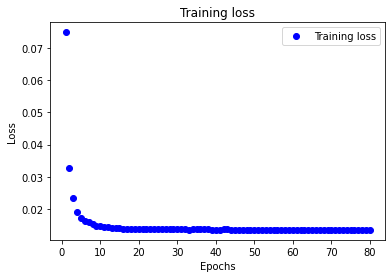

In [ ]:
loss = history.history['loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

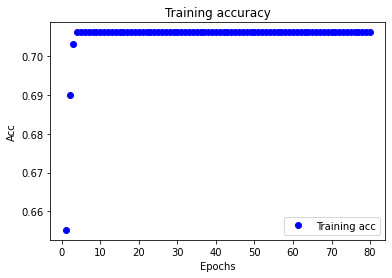

In [ ]:
plt.figure()
acc = history.history['accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

### Result: Caption Neural Network using Bag of Words

In [ ]:
predictions = model.predict(X_test)
Get_score(predictions, y_test)

The Spearman's correlation coefficient is: 0.302
The Spearman's correlation coefficient is: 0.169


In [ ]:
loss, acc = model.evaluate(X_train, y_train, verbose=False)
print("Trainig Accuracy: {:.4f}".format(acc))
loss, acc = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: {:.4f}".format(acc))

Trainig Accuracy: 0.7063
Testing Accuracy: 0.6992


## 1.3 Neural Network: Vecotornizer

Word Embedding

In [ ]:
sentences = new_captions

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(sentences)
wordcount = len(cv.vocabulary_)
print(wordcount)
print(cv.vocabulary_)

5087
{'blonde': 425, 'woman': 5012, 'massaged': 2674, 'tilt': 4564, 'roulette': 3696, 'table': 4446, 'spinning': 4180, 'ball': 265, 'closeup': 881, 'shot': 3943, 'khr': 2370, 'gangsters': 1839, 'medical': 2709, 'helicopter': 2108, 'hovers': 2195, 'airport': 71, 'couple': 1046, 'relaxing': 3578, 'picnic': 3226, 'crane': 1069, 'passing': 3137, 'older': 2998, 'man': 2642, 'reading': 3526, 'christmas': 835, 'village': 4845, 'national': 2904, 'tree': 4677, 'unhappy': 4757, 'friends': 1805, 'looking': 2573, 'something': 4128, 'interesting': 2276, 'television': 4505, 'hoover': 2176, 'dam': 1163, 'tourists': 4627, 'traffic': 4646, 'happy': 2060, 'girl': 1886, 'stretching': 4328, 'station': 4261, 'bread': 512, 'conveyor': 1007, 'close': 877, 'racks': 3482, 'computer': 964, 'equipment': 1502, 'flashing': 1698, 'lights': 2510, 'modern': 2787, 'family': 1583, 'overdue': 3054, 'burn': 576, 'wife': 4972, 'tweeting': 4729, 'phone': 3212, 'street': 4324, 'restaurant': 3606, 'videoblocks': 4837, 'model

In [ ]:
print(sentences)

['blonde woman massaged tilt', 'roulette table spinning ball closeup shot', 'khr gangsters', 'medical helicopter hovers airport', 'couple relaxing picnic crane shot', 'passing older man reading', 'christmas village national christmas tree', 'unhappy friends looking something interesting television', 'hoover dam tourists traffic', 'happy girl stretching relaxing station', 'bread conveyor', 'close racks computer equipment flashing lights', 'modern family overdue burn wife', 'woman tweeting phone street restaurant', 'videoblocks woman model released points sign another woman comes', 'bird barren twig ruins background', 'two walking businessman', 'timelapse snow mountains', 'african hartebeest coming water', 'potter works crockery creation process pottery potters wheel', 'couple relaxing new flat', 'happy couple relaxing tree shadow', 'grandmother walks grandson baby stroller yard camera motion wide shot', 'business report meeting', 'female friends drinking coffee chatting sofa', 'petco pa

In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=wordcount)
tokenizer.fit_on_texts(list(sentences))

In [ ]:
sentences = tokenizer.texts_to_sequences(sentences)
print(sentences)

[[673, 1, 832, 343], [2203, 64, 221, 178, 67, 16], [106, 273], [674, 939, 3021, 137], [6, 93, 471, 315, 16], [448, 1413, 3, 120], [68, 675, 44, 68, 47], [1729, 84, 18, 344, 1730, 1204], [3022, 2204, 274, 252], [9, 8, 940, 93, 241], [941, 3023], [13, 3024, 24, 425, 1731, 345], [52, 37, 1732, 2205, 1414], [1, 2206, 42, 53, 90], [30, 1, 262, 3025, 1205, 449, 611, 1, 2207], [505, 3026, 2208, 3027, 39], [19, 12, 61], [144, 48, 121], [45, 3028, 833, 22], [1415, 506, 1733, 1734, 1416, 1735, 1206, 834], [6, 93, 60, 676], [9, 6, 93, 47, 942], [742, 193, 1070, 159, 3029, 1207, 14, 5, 426, 16], [54, 2209, 366], [23, 84, 49, 100, 275, 122], [2210, 11, 612, 472], [137, 1208], [66, 293, 27, 276, 94], [37, 160, 27, 613], [835, 3030, 48], [2, 3, 1, 203, 316, 32, 81, 90], [123, 1, 1417, 1209], [62, 473, 123, 20, 1418, 1419, 18, 14, 943, 242, 3, 1420, 1736, 13, 116], [68, 332, 3031, 2211, 2211, 2212, 3032], [743, 31, 253, 72, 140], [836, 207], [837, 22, 1737, 474, 399, 4, 5, 346, 22, 837, 532, 77, 1071]

In [ ]:
vocab_size = len(tokenizer.word_index) + 1 #Adding 1 to reverse 0 index

In [ ]:
vocab_size

5099

Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
X = sentences
y = ground_truth.iloc[:, 1:3].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1000)

Padding

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
maxlen = 50
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
print(X_train[0])

[48 39  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0]


In [ ]:
# Embedding Layer
from keras.models import Sequential
from keras import layers

In [ ]:
embedding_dim = 50

In [ ]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           input_length=maxlen
                           ))
model.add(layers.Flatten())
model.add(layers.Dense(10, input_dim=input_dim, activation='relu', kernel_regularizer=regularizers.l2(0.0005)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.0005)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='sigmoid'))
# compile the model 
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])

In [ ]:
# training the model 
history = model.fit(X_train,y_train,epochs=50)

Epoch 1/50
150/150 [==============================] - 1s 3ms/step - loss: 0.0793 - accuracy: 0.5750
Epoch 2/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.6593
Epoch 3/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.7070
Epoch 4/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.6979
Epoch 5/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.7119
Epoch 6/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.7082
Epoch 7/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.7143
Epoch 8/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0144 - accuracy: 0.6918
Epoch 9/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.7153
Epoch 10/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0135 - accuracy: 0.6972

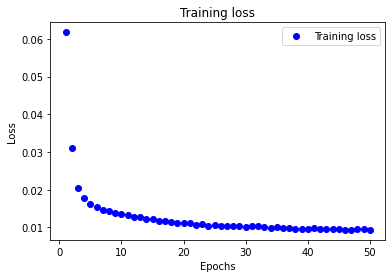

In [ ]:
loss = history.history['loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

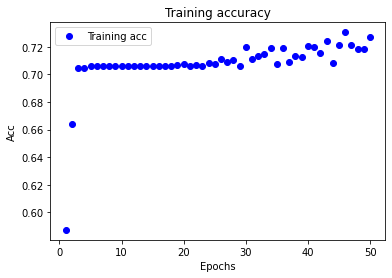

In [ ]:
plt.figure()
acc = history.history['accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(X_test)
Get_score(predictions, y_test)

The Spearman's correlation coefficient is: 0.210
The Spearman's correlation coefficient is: 0.155


In [ ]:
loss, acc = model.evaluate(X_train, y_train, verbose=False)
print("Trainig Accuracy: {:.4f}".format(acc))
loss, acc = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: {:.4f}".format(acc))

Trainig Accuracy: 0.7460
Testing Accuracy: 0.6575


Pooling

In [ ]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           input_length=maxlen
                           ))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, input_dim=input_dim, activation='relu', kernel_regularizer=regularizers.l2(0.0005)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.0005)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='sigmoid'))
# compile the model 
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])

In [ ]:
# training the model 
history = model.fit(X_train,y_train,epochs=50)

Epoch 1/50
150/150 [==============================] - 1s 4ms/step - loss: 0.0929 - accuracy: 0.6053
Epoch 2/50
150/150 [==============================] - 1s 3ms/step - loss: 0.0344 - accuracy: 0.6457
Epoch 3/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.6583
Epoch 4/50
150/150 [==============================] - 1s 4ms/step - loss: 0.0209 - accuracy: 0.6874
Epoch 5/50
150/150 [==============================] - 1s 4ms/step - loss: 0.0182 - accuracy: 0.6948
Epoch 6/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.7002
Epoch 7/50
150/150 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 0.7141
Epoch 8/50
150/150 [==============================] - 1s 4ms/step - loss: 0.0149 - accuracy: 0.7057
Epoch 9/50
150/150 [==============================] - 1s 4ms/step - loss: 0.0149 - accuracy: 0.7031
Epoch 10/50
150/150 [==============================] - 1s 3ms/step - loss: 0.0147 - accuracy: 0.6994

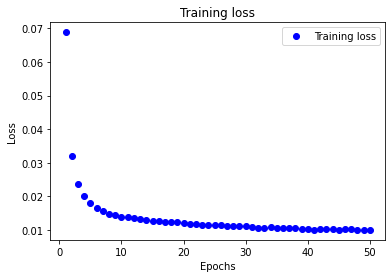

In [ ]:
loss = history.history['loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

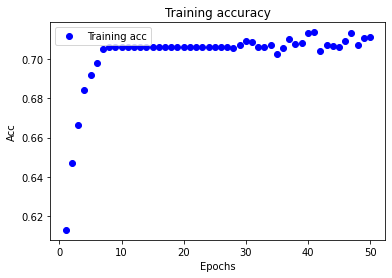

In [ ]:
plt.figure()
acc = history.history['accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

### Result: Cpation Neural Network using Word Embedding

In [ ]:
predictions = model.predict(X_test)
Get_score(predictions, y_test)

The Spearman's correlation coefficient is: 0.250
The Spearman's correlation coefficient is: 0.182


In [ ]:
loss, acc = model.evaluate(X_train, y_train, verbose=False)
print("Trainig Accuracy: {:.4f}".format(acc))
loss, acc = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: {:.4f}".format(acc))

Trainig Accuracy: 0.7315
Testing Accuracy: 0.6842


Word2Vec

## 1.4 CNN

In [ ]:
embedding_dim = 50
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           input_length=maxlen
                           ))
model.add(layers.Conv1D(256, 3, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, input_dim=input_dim, activation='relu', kernel_regularizer=regularizers.l2(0.0005)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.0005)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='sigmoid'))
# compile the model 
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=50)

Epoch 1/50
150/150 [==============================] - 4s 17ms/step - loss: 0.0787 - accuracy: 0.5539
Epoch 2/50
150/150 [==============================] - 3s 17ms/step - loss: 0.0365 - accuracy: 0.6151
Epoch 3/50
150/150 [==============================] - 3s 17ms/step - loss: 0.0246 - accuracy: 0.6680
Epoch 4/50
150/150 [==============================] - 3s 17ms/step - loss: 0.0203 - accuracy: 0.6971
Epoch 5/50
150/150 [==============================] - 3s 17ms/step - loss: 0.0173 - accuracy: 0.6978
Epoch 6/50
150/150 [==============================] - 3s 17ms/step - loss: 0.0163 - accuracy: 0.6965
Epoch 7/50
150/150 [==============================] - 3s 17ms/step - loss: 0.0141 - accuracy: 0.7066
Epoch 8/50
150/150 [==============================] - 3s 17ms/step - loss: 0.0140 - accuracy: 0.6949
Epoch 9/50
150/150 [==============================] - 3s 17ms/step - loss: 0.0132 - accuracy: 0.7117
Epoch 10/50
150/150 [==============================] - 3s 17ms/step - loss: 0.0124 - accura

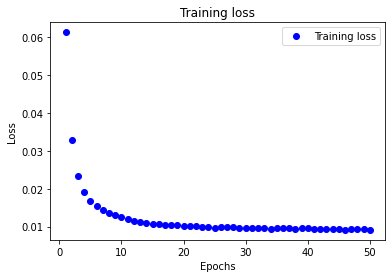

In [ ]:
loss = history.history['loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

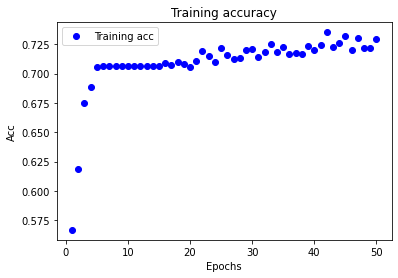

In [ ]:
plt.figure()
acc = history.history['accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

### Result: Cpation Convolutional Neural Network

In [ ]:
predictions = model.predict(X_test)
Get_score(predictions, y_test)
loss, acc = model.evaluate(X_train, y_train, verbose=False)
print("Trainig Accuracy: {:.4f}".format(acc))
loss, acc = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: {:.4f}".format(acc))

The Spearman's correlation coefficient is: 0.205
The Spearman's correlation coefficient is: 0.168
Trainig Accuracy: 0.7473
Testing Accuracy: 0.6308


## 1.5 Random Forest: Caption

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
sentences = new_captions
cv = CountVectorizer()
cv.fit(sentences)
sentences = cv.transform(sentences).toarray()

In [12]:
X = sentences
y = ground_truth.iloc[:, 1:3].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1000)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF_captions = RandomForestRegressor()
RF_captions.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Result: Cpation Random Forest

In [ ]:
y_preds = RF_captions.predict(X_test)
Get_score(y_preds, y_test)

The Spearman's correlation coefficient is: 0.380
The Spearman's correlation coefficient is: 0.141


Editing the parameters

In [14]:
X = sentences
y = ground_truth.iloc[:, 1:3].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1000)

In [18]:
# 2nd
from sklearn.ensemble import RandomForestRegressor

RF_captions2 = RandomForestRegressor(n_estimators=200
                                ,random_state=90)

In [19]:
RF_captions2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=90, verbose=0, warm_start=False)

In [23]:
y_preds = RF_captions2.predict(X_test)
Get_score(y_preds, y_test)

The Spearman's correlation coefficient is: 0.383
The Spearman's correlation coefficient is: 0.154


# 2. Modelling with Captions Using TfidfVectorizer

## Pre-Processing

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(stop_words='english')

In [ ]:
tf_captions = captions
tf_captions.head()

,video,short-term_memorability,long-term_memorability,captions
0,video3.webm,0.924,0.846,blonde-woman-is-massaged-tilt-down
1,video4.webm,0.923,0.667,roulette-table-spinning-with-ball-in-closeup-shot
2,video6.webm,0.863,0.700,khr-gangsters
3,video8.webm,0.922,0.818,medical-helicopter-hovers-at-airport
4,video10.webm,0.950,0.900,couple-relaxing-on-picnic-crane-shot


In [ ]:
tfidf = tf_idf.fit_transform(tf_captions['captions'])

tfidf = tfidf.toarray()
tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X = tfidf
y = ground_truth.iloc[:, 1:3].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1000)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4800, 5019)
(1200, 5019)
(4800, 2)
(1200, 2)


## 2.1 Linear Regression: TfidfVectorizer

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_preds = LR.predict(X_test)
Get_score(y_preds, y_test)

The Spearman's correlation coefficient is: 0.115
The Spearman's correlation coefficient is: 0.054


## 2.2 Neural Network: TfidfVectorizer

In [ ]:
from keras.models import Sequential
from keras import layers
from tensorflow.python.keras import regularizers

In [ ]:
input_dim = X_train.shape[1]
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu', kernel_regularizer=regularizers.l2(0.0005)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.0005)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='sigmoid'))
# compile the model 
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])
# training the model 
history = model.fit(X_train,y_train,epochs=20)

Epoch 1/20
150/150 [==============================] - 1s 3ms/step - loss: 0.0995 - accuracy: 0.4384
Epoch 2/20
150/150 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.4982
Epoch 3/20
150/150 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.6011
Epoch 4/20
150/150 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.6687
Epoch 5/20
150/150 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 0.7131
Epoch 6/20
150/150 [==============================] - 0s 3ms/step - loss: 0.0166 - accuracy: 0.7057
Epoch 7/20
150/150 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 0.7179
Epoch 8/20
150/150 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.7027
Epoch 9/20
150/150 [==============================] - 0s 3ms/step - loss: 0.0152 - accuracy: 0.7024
Epoch 10/20
150/150 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.6911

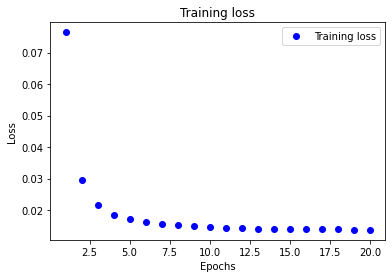

In [ ]:
loss = history.history['loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

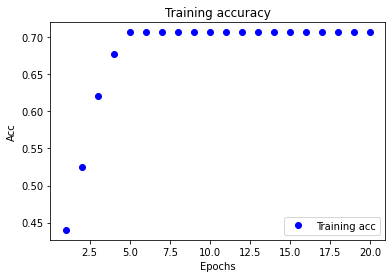

In [ ]:
plt.figure()
acc = history.history['accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(X_test)
Get_score(predictions, y_test)

The Spearman's correlation coefficient is: 0.266
The Spearman's correlation coefficient is: 0.156


## 2.3 Random Forest: TfidfVectorizer

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF_tfidf = RandomForestRegressor()
RF_tfidf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_preds = RF_tfidf.predict(X_test)
Get_score(y_preds, y_test)

The Spearman's correlation coefficient is: 0.357
The Spearman's correlation coefficient is: 0.131


# 3. Modelling with C3D

## Pre-Processing

In [ ]:
c3d.head()

,video,short-term_memorability,long-term_memorability,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,video3.webm,0.924,0.846,0.020249,0.001578,0.000826,0.000945,0.000063,0.000003,0.001162,0.000097,0.000022,0.000010,0.000337,0.000636,1.111700e-04,0.001008,0.000004,0.000631,3.905000e-05,0.000041,0.000091,0.000303,1.541000e-05,0.000032,5.221000e-05,0.000062,0.017465,0.000666,0.000065,0.000054,0.000273,0.001386,0.000003,0.001356,0.000517,2.426120e-03,0.002719,2.770000e-06,0.001557,...,0.096647,0.004458,0.011840,0.000287,0.002195,0.002792,0.000018,0.003365,0.000061,0.000573,0.000273,0.000034,0.006737,0.000021,0.000098,2.502000e-05,0.005768,2.990000e-06,0.000085,0.000607,0.000461,0.001189,0.000270,0.000127,0.000106,0.000154,0.000567,0.000020,0.000894,0.001079,0.001042,0.000161,0.000257,0.046617,0.000156,0.000006,0.000537,0.000339,0.008437,0.000470
1,video4.webm,0.923,0.667,0.000118,0.000891,0.000188,0.000045,0.000063,0.000002,0.000641,0.000011,0.000017,0.000014,0.000336,0.004081,5.900000e-07,0.000411,0.000003,0.000243,6.600000e-07,0.000002,0.000535,0.000278,4.804000e-05,0.001153,2.792000e-05,0.000040,0.022276,0.004529,0.000020,0.000029,0.000045,0.060436,0.000039,0.027208,0.000074,2.719000e-05,0.000623,2.609600e-04,0.000183,...,0.000372,0.000154,0.000148,0.000086,0.000267,0.000014,0.001430,0.004417,0.000064,0.000105,0.003129,0.000055,0.000061,0.000025,0.004283,1.032000e-05,0.000062,2.903000e-05,0.000374,0.000139,0.741702,0.007178,0.000346,0.000104,0.000181,0.000052,0.004839,0.000078,0.042325,0.000623,0.000582,0.000393,0.000864,0.000947,0.000136,0.000007,0.000360,0.000159,0.001025,0.000020
2,video6.webm,0.863,0.700,0.011765,0.000746,0.000784,0.000013,0.000007,0.000028,0.000041,0.000014,0.000041,0.000083,0.000048,0.000080,1.066610e-03,0.000958,0.000011,0.000070,2.992000e-05,0.000038,0.000031,0.000008,9.700000e-07,0.002905,1.849000e-05,0.000013,0.000192,0.000050,0.000532,0.000027,0.000051,0.000010,0.000005,0.000029,0.000033,3.260172e-02,0.000034,7.100000e-07,0.000006,...,0.876291,0.005509,0.008852,0.000399,0.000069,0.013166,0.000015,0.000044,0.000520,0.000046,0.000007,0.000024,0.010491,0.000475,0.000023,5.590000e-06,0.005554,2.500000e-07,0.000057,0.000328,0.000149,0.001844,0.000008,0.000103,0.000030,0.000005,0.000179,0.000001,0.000006,0.000215,0.000224,0.000003,0.000031,0.002538,0.000104,0.000005,0.000064,0.005380,0.001027,0.001384
3,video8.webm,0.922,0.818,0.000223,0.000165,0.000007,0.000016,0.000005,0.000014,0.000154,0.000008,0.000004,0.000009,0.001057,0.000126,3.404000e-05,0.000004,0.000006,0.000012,1.940000e-06,0.000003,0.001759,0.000005,8.330000e-06,0.000027,3.200000e-07,0.000010,0.000137,0.000006,0.000005,0.000008,0.000008,0.000611,0.000166,0.583214,0.000004,2.100000e-07,0.000002,2.136000e-05,0.000003,...,0.000009,0.000007,0.000005,0.000539,0.000035,0.000391,0.000021,0.000043,0.000010,0.000028,0.012471,0.006671,0.001187,0.000002,0.119488,5.600000e-07,0.000004,4.250000e-06,0.000040,0.000148,0.103989,0.058989,0.000002,0.000069,0.000004,0.000130,0.001182,0.000003,0.000006,0.000044,0.000046,0.000009,0.000023,0.000053,0.000048,0.000019,0.000001,0.000004,0.000380,0.000029
4,video10.webm,0.950,0.900,0.000090,0.000615,0.003436,0.001281,0.003551,0.000313,0.000042,0.000018,0.000157,0.000117,0.000256,0.000116,3.234800e-04,0.009888,0.000001,0.000576,3.004000e-05,0.000008,0.002029,0.000016,7.690000e-06,0.007324,2.863000e-05,0.000015,0.035220,0.000153,0.001053,0.000031,0.000026,0.001376,0.000215,0.001759,0.000013,1.698540e-03,0.000248,1.754577e-02,0.000260,...,0.000236,0.000046,0.000027,0.000203,0.010644,0.000252,0.000349,0.001776,0.000006,0.001443,0.000146,0.019003,0.000584,0.000027,0.000692,5.650000e-06,0.000403,2.894700e-04,0.000197,0.001254,0.005257,0.045808,0.000008,0.000296,0.003893,0.000318,0.000048,0.000018,0.000264,0.000026,0.000037,0.000690,0.000171,0.00023

In [ ]:
features_c3d = c3d.iloc[:, 3:104].values
features_c3d.shape

(6000, 101)

In [ ]:
labels_c3d = c3d.iloc[:, 1:3].values
labels_c3d.shape

(6000, 2)

In [ ]:
X = features_c3d
y = labels_c3d

## 3.1 Linear Regression: C3D

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = features_c3d
y = labels_c3d
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1000)

LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Result: C3D Linear Regression

In [ ]:
y_pred = LR.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.296
The Spearman's correlation coefficient is: 0.149


## 3.2 Neural Network: C3D

In [ ]:
from keras.models import Sequential
from keras import layers
from tensorflow.python.keras import regularizers

In [ ]:
from sklearn.model_selection import train_test_split
X = features_c3d
y = labels_c3d
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1000)

In [ ]:
X_train.shape

(4800, 101)

In [ ]:
max_len = 101
model = Sequential()
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_shape=(max_len,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='sigmoid'))
# compile the model 
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])
# training the model 
history = model.fit(X_train,y_train,epochs=30)

Epoch 1/30
150/150 [==============================] - 1s 3ms/step - loss: 0.0541 - accuracy: 0.6790
Epoch 2/30
150/150 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.7065
Epoch 3/30
150/150 [==============================] - 0s 3ms/step - loss: 0.0158 - accuracy: 0.7193
Epoch 4/30
150/150 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.7121
Epoch 5/30
150/150 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.6991
Epoch 6/30
150/150 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 0.6986
Epoch 7/30
150/150 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.7124
Epoch 8/30
150/150 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 0.7098
Epoch 9/30
150/150 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 0.7058
Epoch 10/30
150/150 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 0.7013

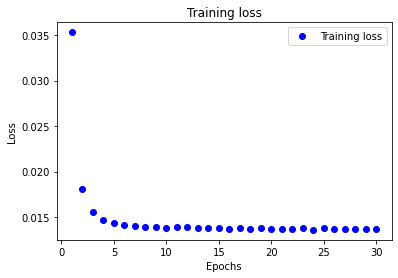

In [ ]:
loss = history.history['loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

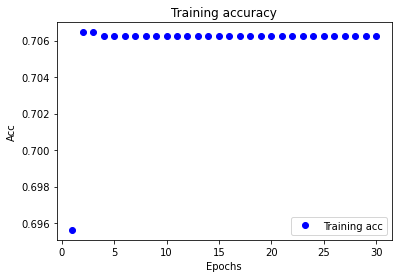

In [ ]:
plt.figure()
acc = history.history['accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

### Result: C3D Neural Network

In [ ]:
predictions = model.predict(X_test)
Get_score(predictions, y_test)
loss, acc = model.evaluate(X_train, y_train, verbose=False)
print("Trainig Accuracy: {:.4f}".format(acc))
loss, acc = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: {:.4f}".format(acc))

The Spearman's correlation coefficient is: 0.283
The Spearman's correlation coefficient is: 0.175
Trainig Accuracy: 0.7063
Testing Accuracy: 0.6992


## 3.3 Random Forest

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor


In [ ]:
from sklearn.model_selection import train_test_split
X = features_c3d
y = labels_c3d
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 200)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Result: C3D Random Forest

In [ ]:
y_preds = RF.predict(X_test)
Get_score(y_preds, y_test)

The Spearman's correlation coefficient is: 0.296
The Spearman's correlation coefficient is: 0.112


# 4. Modelling with HMP

## Pre-Processing

In [ ]:
hmp.head()

,video,short-term_memorability,long-term_memorability,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,6035,6036,6037,6038,6039,6040,6041,6042,6043,6044,6045,6046,6047,6048,6049,6050,6051,6052,6053,6054,6055,6056,6057,6058,6059,6060,6061,6062,6063,6064,6065,6066,6067,6068,6069,6070,6071,6072,6073,6074
0,video3.webm,0.924,0.846,0.125563,0.024036,0.000314,0.0,0.015864,0.000358,0.0,0.000000,0.000086,0.0,0.0,0.0,0.0,0.002795,0.000054,0.0,0.000000,0.000037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000002,0.000173,0.000459,0.000000,0.000148,0.000104,0.000000,0.000121,0.000551,0.000000,0.000114,0.000884,0.000002,0.000116,0.000077,0.000002,0.000027,0.000136,0.000000,0.000000,0.000002,0.000000,0.000091,0.000035,0.000000,0.000163,0.000467,0.000002,0.000010,0.000017,0.000000,0.000393,0.000279,0.000000,0.000289,0.001926,0.000000,0.000086,0.000580,0.000000
1,video4.webm,0.923,0.667,0.007526,0.001421,0.000068,0.0,0.001184,0.000143,0.0,0.000000,0.000079,0.0,0.0,0.0,0.0,0.000246,0.000024,0.0,0.000000,0.000042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000685,0.000308,0.001054,0.000751,0.000176,0.000062,0.000000,0.000123,0.000398,0.000086,0.000246,0.000433,0.000446,0.000143,0.000053,0.000000,0.000053,0.000099,0.000009,0.000004,0.000033,0.000004,0.000051,0.000035,0.000000,0.000062,0.000358,0.000035,0.000024,0.000083,0.000053,0.000244,0.000066,0.000000,0.000081,0.000617,0.000094,0.000220,0.000762,0.001224
2,video6.webm,0.863,0.700,0.109584,0.018978,0.000289,0.0,0.008774,0.000208,0.0,0.000002,0.000088,0.0,0.0,0.0,0.0,0.002046,0.000061,0.0,0.000000,0.000038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000083,0.000057,0.000158,0.000073,0.000021,0.000009,0.000002,0.000019,0.000095,0.000021,0.000019,0.000090,0.000073,0.000050,0.000024,0.000000,0.000012,0.000021,0.000000,0.000000,0.000002,0.000000,0.000017,0.000007,0.000002,0.000066,0.000203,0.000026,0.000002,0.000040,0.000007,0.000054,0.000045,0.000000,0.000028,0.000291,0.000033,0.000052,0.000258,0.000215
3,video8.webm,0.922,0.818,0.120431,0.013561,0.000277,0.0,0.018974,0.000913,0.0,0.000024,0.000713,0.0,0.0,0.0,0.0,0.002496,0.000149,0.0,0.000011,0.000157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000210,0.000434,0.000543,0.000412,0.000412,0.000045,0.000003,0.000144,0.000282,0.000037,0.000197,0.000218,0.000157,0.000237,0.000021,0.000000,0.000040,0.000056,0.000008,0.000005,0.000013,0.000019,0.000168,0.000013,0.000000,0.000133,0.000202,0.000029,0.000029,0.000035,0.000059,0.001110,0.000075,0.000008,0.000333,0.000793,0.000101,0.000588,0.000503,0.000452
4,video10.webm,0.950,0.900,0.005026,0.001356,0.000055,0.0,0.000665,0.000029,0.0,0.000000,0.000024,0.0,0.0,0.0,0.0,0.000147,0.000020,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000160,0.000996,0.001604,0.000103,0.000768,0.000215,0.000009,0.000415,0.000926,0.000020,0.000538,0.001178,0.000050,0.000518,0.000169,0.000007,0.000134,0.000169,0.000007,0.000026,0.000046,0.000007,0.000373,0.000088,0.000000,0.000338,0.000441,0.000029,0.000070,0.000149,0.000009,0.000882,0.000200,0.000009,0.000559,0.001097,0.000018,0.000632,0.001128,0.000064


In [ ]:
features_hmp = hmp.iloc[:, 3:].values
labels_hmp = hmp.iloc[:, 1:3].values
X = features_hmp
y = labels_hmp

In [ ]:
X.shape

(6000, 6075)

## 4.1 Linear Regression: HMP

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = features_hmp
y = labels_hmp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1000)

LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Result: HMP Linear Regression

In [ ]:
y_pred = LR.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.068
The Spearman's correlation coefficient is: -0.020


## 4.2 Neural Network: HMP

In [ ]:
from sklearn.model_selection import train_test_split
X = features_hmp
y = labels_hmp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1000)

In [ ]:
X_train.shape

(4800, 6075)

In [ ]:
max_len = 6075
model = Sequential()
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_shape=(max_len,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='sigmoid'))
# compile the model 
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])
# training the model 
history = model.fit(X_train,y_train,epochs=10)

Epoch 1/10
150/150 [==============================] - 4s 25ms/step - loss: 0.0540 - accuracy: 0.6991
Epoch 2/10
150/150 [==============================] - 4s 26ms/step - loss: 0.0157 - accuracy: 0.7078
Epoch 3/10
150/150 [==============================] - 4s 26ms/step - loss: 0.0150 - accuracy: 0.7079
Epoch 4/10
150/150 [==============================] - 4s 25ms/step - loss: 0.0148 - accuracy: 0.7024
Epoch 5/10
150/150 [==============================] - 4s 25ms/step - loss: 0.0142 - accuracy: 0.7008
Epoch 6/10
150/150 [==============================] - 4s 25ms/step - loss: 0.0146 - accuracy: 0.7017
Epoch 7/10
150/150 [==============================] - 4s 25ms/step - loss: 0.0142 - accuracy: 0.6982
Epoch 8/10
150/150 [==============================] - 4s 25ms/step - loss: 0.0141 - accuracy: 0.7106
Epoch 9/10
150/150 [==============================] - 4s 24ms/step - loss: 0.0137 - accuracy: 0.7099
Epoch 10/10
150/150 [==============================] - 4s 24ms/step - loss: 0.0141 - accura

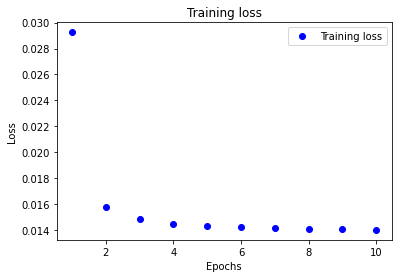

In [ ]:
loss = history.history['loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

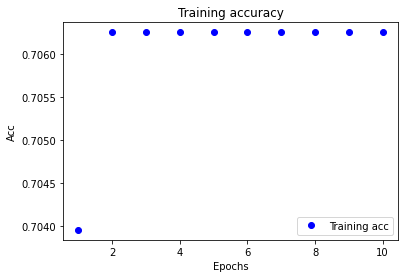

In [ ]:
plt.figure()
acc = history.history['accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

### Result: HMP Neural Network

In [ ]:
predictions = model.predict(X_test)
Get_score(predictions, y_test)
loss, acc = model.evaluate(X_train, y_train, verbose=False)
print("Trainig Accuracy: {:.4f}".format(acc))
loss, acc = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: {:.4f}".format(acc))

The Spearman's correlation coefficient is: 0.165
The Spearman's correlation coefficient is: 0.096
Trainig Accuracy: 0.7063
Testing Accuracy: 0.6992


## 4.3 Random Forest: HMP

In [ ]:
from sklearn.model_selection import train_test_split
X = features_hmp
y = labels_hmp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 200)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Result: HMP Random Forest

In [ ]:
y_preds_hmp = RF.predict(X_test)
Get_score(y_preds_hmp, y_test)

The Spearman's correlation coefficient is: 0.243
The Spearman's correlation coefficient is: 0.061


# 5. Modelling With InceptionV3

## Pre-Processing

In [ ]:
inceptionV3.head()

,video,short-term_memorability,long-term_memorability,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,video3.webm,0.924,0.846,2.029453e-08,1.090344e-12,3.431364e-09,8.189898e-13,3.655273e-14,1.865599e-10,8.025114e-11,2.112834e-12,1.279893e-10,1.421777e-10,4.301907e-10,2.286679e-06,7.681828e-11,3.794470e-11,2.475117e-10,2.236110e-12,3.848590e-11,4.740011e-10,3.198078e-13,8.395070e-11,6.721827e-08,1.245910e-13,5.518279e-11,6.730328e-13,2.257557e-09,7.238943e-09,1.233821e-12,1.598541e-09,2.569910e-09,2.155077e-09,1.372267e-08,1.807634e-08,4.841556e-13,4.985509e-12,4.888466e-04,1.748098e-11,3.878522e-12,...,5.504524e-13,1.729948e-10,4.324135e-10,4.488289e-11,9.309242e-11,7.327435e-12,2.575580e-11,2.548098e-12,3.507918e-08,2.602202e-13,2.668102e-09,7.477819e-07,1.022439e-16,1.877881e-13,3.042647e-10,3.940097e-15,4.940004e-17,9.180812e-20,7.647996e-08,3.100791e-08,4.351464e-13,1.004334e-09,9.868457e-08,1.105340e-13,2.341297e-15,1.761305e-10,2.528041e-09,1.505675e-08,3.403410e-08,1.102657e-14,2.773339e-09,4.252009e-13,3.056650e-12,5.498894e-11,4.302251e-14,1.781814e-11,3.063809e-14,1.101414e-11,3.240121e-15,2.704308e-10
1,video4.webm,0.923,0.667,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.100784e-35,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,5.501538e-24,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.093556e-24,0.000000e+00,0.000000e+00,1.775702e-37,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,video6.webm,0.863,0.700,2.271325e-16,2.926813e-18,3.022254e-19,4.139101e-19,2.944877e-18,2.932248e-15,6.475311e-18,8.793485e-19,1.097446e-15,2.816225e-17,2.516601e-18,9.759668e-13,3.290630e-17,2.100690e-15,6.728361e-16,1.141341e-16,2.508131e-16,6.879621e-16,9.331942e-21,5.544335e-18,4.058185e-15,1.815704e-20,7.948132e-19,5.282856e-19,2.566663e-14,1.968903e-12,1.671343e-24,6.368899e-16,1.098628e-12,7.532960e-17,3.520869e-10,1.233129e-15,2.850956e-24,4.173718e-17,4.562128e-09,1.941678e-16,5.656070e-22,...,4.983875e-21,9.521967e-18,7.938202e-17,9.961560e-17,2.722320e-14,4.582787e-21,2.669127e-17,4.207481e-24,1.602321e-14,6.119853e-20,1.898454e-21,1.720160e-15,1.539879e-29,4.526580e-21,2.062750e-13,5.335764e-24,1.081799e-25,3.227003e-28,1.049013e-07,6.889270e-13,2.390780e-20,4.689680e-19,3.255726e-13,1.908798e-25,1.175189e-21,1.058365e-17,5.736792e-16,8.558914e-10,7.972950e-17,1.706612e-22,2.316734e-15,5.629470e-20,1.055689e-14,2.007447e-14,2.190508e-20,7.403642e-19,8.302431e-23,1.294177e-16,3.238963e-22,4.603321e-21
3,video8.webm,0.922,0.818,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00

In [ ]:
features_iv3 = inceptionV3.iloc[:, 3:].values
features_iv3.shape

(6000, 1000)

In [ ]:
labels_iv3 = inceptionV3.iloc[:, 1:3].values
labels_iv3.shape

(6000, 2)

In [ ]:
X = features_iv3
y = labels_iv3

## 5.1 Linear Regression: InceptionV3

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = features_iv3
y = labels_iv3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1000)

LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Result: InceptionV3 Linear Regression

In [ ]:
y_pred = LR.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.084
The Spearman's correlation coefficient is: 0.021


## 5.2 Neural Network: InceptionV3

In [ ]:
from sklearn.model_selection import train_test_split
X = features_iv3
y = labels_iv3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1000)

In [ ]:
X_train.shape

(4800, 1000)

In [ ]:
max_len = 1000
model = Sequential()
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_shape=(max_len,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='sigmoid'))
# compile the model 
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])
# training the model 
history = model.fit(X_train,y_train,epochs=30)

Epoch 1/30
150/150 [==============================] - 2s 7ms/step - loss: 0.0550 - accuracy: 0.6926
Epoch 2/30
150/150 [==============================] - 1s 6ms/step - loss: 0.0174 - accuracy: 0.7179
Epoch 3/30
150/150 [==============================] - 1s 7ms/step - loss: 0.0155 - accuracy: 0.6921
Epoch 4/30
150/150 [==============================] - 1s 7ms/step - loss: 0.0152 - accuracy: 0.7079
Epoch 5/30
150/150 [==============================] - 1s 7ms/step - loss: 0.0143 - accuracy: 0.7085
Epoch 6/30
150/150 [==============================] - 1s 7ms/step - loss: 0.0142 - accuracy: 0.7132
Epoch 7/30
150/150 [==============================] - 1s 7ms/step - loss: 0.0144 - accuracy: 0.7044
Epoch 8/30
150/150 [==============================] - 1s 6ms/step - loss: 0.0138 - accuracy: 0.7184
Epoch 9/30
150/150 [==============================] - 1s 7ms/step - loss: 0.0139 - accuracy: 0.7140
Epoch 10/30
150/150 [==============================] - 1s 7ms/step - loss: 0.0141 - accuracy: 0.7134

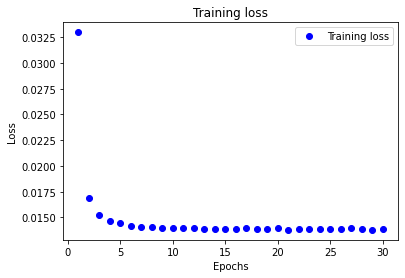

In [ ]:
loss = history.history['loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

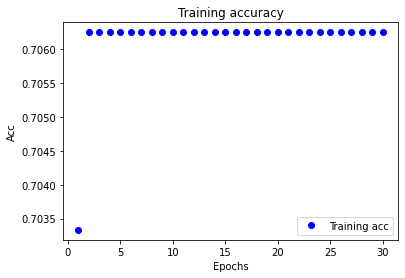

In [ ]:
plt.figure()
acc = history.history['accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

### Result: InceptionV3 Neural Network

In [ ]:
predictions = model.predict(X_test)
Get_score(predictions, y_test)
loss, acc = model.evaluate(X_train, y_train, verbose=False)
print("Trainig Accuracy: {:.4f}".format(acc))
loss, acc = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy: {:.4f}".format(acc))

The Spearman's correlation coefficient is: 0.118
The Spearman's correlation coefficient is: 0.085
Trainig Accuracy: 0.7063
Testing Accuracy: 0.6992


## 5.3 Random Forest: InceptionV3

In [ ]:
from sklearn.model_selection import train_test_split
X = features_iv3
y = labels_iv3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 100)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## Result: InceptionV3 Random Forest

In [ ]:
y_preds_iv3 = RF.predict(X_test)
Get_score(y_preds_iv3, y_test)

The Spearman's correlation coefficient is: -0.076
The Spearman's correlation coefficient is: -0.057


# Predicting Test set

Based on the result, I got the best result from the Random Forest model with Captions, so I finally chose this model as my predictor.

## 1. Import Test data

In [ ]:
test_ground_truth = pd.read_csv('/content/drive/MyDrive/CA684_Assignment/Test-set/Ground-truth_test/ground_truth_template.csv')

In [ ]:
test_ground_truth.head()

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,7494,NaN,33,NaN,12
1,7495,NaN,34,NaN,10
2,7496,NaN,32,NaN,13
3,7497,NaN,33,NaN,10
4,7498,NaN,33,NaN,10


In [ ]:
test_captions = pd.read_csv('/content/drive/MyDrive/CA684_Assignment/Test-set/Captions_test/test-set-1_video-captions.txt', delimiter='\t',header= None,names=('video','captions'))

In [ ]:
test_captions

,video,captions
0,video7494.webm,green-jeep-struggling-to-drive-over-huge-rocks
1,video7495.webm,hiking-woman-tourist-is-walking-forward-in-mou...
2,video7496.webm,close-up-of-african-american-doctors-hands-usi...
3,video7497.webm,slow-motion-of-a-man-using-treadmill-in-the-gy...
4,video7498.webm,slow-motion-of-photographer-in-national-park
...,...,...
1995,video10004.webm,astronaut-in-outer-space-against-the-backdrop-...
1996,video10005.webm,young-women-lying-on-sunbed-and-applying-sun-c...
1997,video10006.webm,doctor-talking-to-patient-using-a-tablet-to-ex...
1998,video10007.webm,businessman-sitting-on-the-beach-on-inflatable...


## 2. Pre-Processing the test data

In [ ]:
captions

,video,short-term_memorability,long-term_memorability,captions
0,video3.webm,0.924,0.846,blonde-woman-is-massaged-tilt-down
1,video4.webm,0.923,0.667,roulette-table-spinning-with-ball-in-closeup-shot
2,video6.webm,0.863,0.700,khr-gangsters
3,video8.webm,0.922,0.818,medical-helicopter-hovers-at-airport
4,video10.webm,0.950,0.900,couple-relaxing-on-picnic-crane-shot
...,...,...,...,...
5995,video7488.webm,0.921,1.000,beautiful-young-woman-in-front-of-fountains
5996,video7489.webm,0.909,0.839,focus-pull-from-molting-penguin-to-penguin-col...
5997,video7491.webm,0.713,0.818,students-walking-in-university-of-mexico
5998,video7492.webm,0.954,1.000,beautiful-black-woman-at-spa


In [ ]:
dev_captions = captions.drop(['short-term_memorability', 'long-term_memorability'], axis=1)

In [ ]:
dev_captions

,video,captions
0,video3.webm,blonde-woman-is-massaged-tilt-down
1,video4.webm,roulette-table-spinning-with-ball-in-closeup-shot
2,video6.webm,khr-gangsters
3,video8.webm,medical-helicopter-hovers-at-airport
4,video10.webm,couple-relaxing-on-picnic-crane-shot
...,...,...
5995,video7488.webm,beautiful-young-woman-in-front-of-fountains
5996,video7489.webm,focus-pull-from-molting-penguin-to-penguin-col...
5997,video7491.webm,students-walking-in-university-of-mexico
5998,video7492.webm,beautiful-black-woman-at-spa


In [ ]:
final_captions = pd.concat([test_captions, dev_captions], ignore_index=True)

In [ ]:
final_captions

,video,captions
0,video7494.webm,green-jeep-struggling-to-drive-over-huge-rocks
1,video7495.webm,hiking-woman-tourist-is-walking-forward-in-mou...
2,video7496.webm,close-up-of-african-american-doctors-hands-usi...
3,video7497.webm,slow-motion-of-a-man-using-treadmill-in-the-gy...
4,video7498.webm,slow-motion-of-photographer-in-national-park
...,...,...
7995,video7488.webm,beautiful-young-woman-in-front-of-fountains
7996,video7489.webm,focus-pull-from-molting-penguin-to-penguin-col...
7997,video7491.webm,students-walking-in-university-of-mexico
7998,video7492.webm,beautiful-black-woman-at-spa


Creating the bag of words for combing data

In [ ]:
final_features = []
for i in range(len(final_captions)):
  text = re.sub('[^a-zA-Z]', ' ', final_captions['captions'][i])
  text = text.lower()
  text = text.split()
  text = [word for word in text if not word in set(stopwords.words('english'))]
  text = ' '.join(text)
  final_features.append(text)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
final_sentences = final_features
cv = CountVectorizer()
cv.fit(final_sentences)
final_sentences = cv.transform(final_sentences).toarray()

In [ ]:
final_sentences.shape

(8000, 5762)

In [ ]:
captions_train = final_sentences[:6000]
captions_test = final_sentences[6000:]
y = ground_truth.iloc[:, 1:3].values

In [ ]:
captions_train.shape

(6000, 5762)

In [ ]:
captions_test.shape

(2000, 5762)

## 3. Predicting

In [ ]:
X= captions_train
y = ground_truth.iloc[:, 1:3].values

In [ ]:
RF_final = RandomForestRegressor(n_estimators=150)
RF_final.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
predictions = RF_final.predict(captions_test)
predictions

array([[0.86860459, 0.77575456],
       [0.84446222, 0.86663   ],
       [0.884658  , 0.79650067],
       ...,
       [0.89940178, 0.83431644],
       [0.85668094, 0.76019883],
       [0.91213475, 0.81393084]])

In [ ]:
test_ground_truth['short-term_memorability'] = predictions[:,0]

In [ ]:
test_ground_truth['long-term_memorability'] = predictions[:,1]

In [ ]:
test_ground_truth

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,7494,0.868605,33,0.775755,12
1,7495,0.844462,34,0.866630,10
2,7496,0.884658,32,0.796501,13
3,7497,0.908500,33,0.915593,10
4,7498,0.866771,33,0.777673,10
...,...,...,...,...,...
1995,10004,0.857187,34,0.861068,17
1996,10005,0.873981,34,0.615639,9
1997,10006,0.899402,34,0.834316,12
1998,10007,0.856681,34,0.760199,12


In [ ]:
test_ground_truth.to_csv('Qinyan_Chen_19215239_predictions.csv')
from google.colab import files
files.download("Qinyan_Chen_19215239_predictions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.externals import joblib
joblib.dump(RF_final, "./train_model_rf.m")

['./train_model_rf.m']